**This Project's purpose is to develope an algorithm that can predict the percieved consumer value to an accuracy of 90% or higher**

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Import the Data**

In [86]:
dataset = pd.read_csv('car.data.txt', sep=",", header=None)
dataset.columns = ['buying','maint','doors','persons','lug_boot','safety','value']

#Change 5more to more
dataset['doors'] = dataset['doors'].replace({'5more':5})
dataset['persons'] = dataset['persons'].replace({'more':5})
dataset.doors = pd.to_numeric(dataset.doors)
dataset.persons = pd.to_numeric(dataset.persons)
dataset

,buying,maint,doors,persons,lug_boot,safety,value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


**Map the data to discrete integer values**

| For car evaluation domain

| class values

    unacc, acc, good, vgood           **Determined Value**    ==>  1, 2, 3, 4

| attributes

    buying:   vhigh, high, med, low.  **Purchase price**      ==>  4, 3, 2, 1
    maint:    vhigh, high, med, low.  **Maintenance Cost**    ==>  4, 3, 2, 1
    doors:    2, 3, 4, 5more.         **Number of doors**     ==>  2, 3, 4, 5
    persons:  2, 4, more.             **Person Capacity**     ==>  2, 4, 5
    lug_boot: small, med, big.        **Luggage Boot Size**   ==>  1, 2, 3
    safety:   low, med, high.         **Determined Safety**   ==>  1, 2, 3

In [87]:
dataset['buying'] = dataset['buying'].replace({'vhigh':4, 'high':3, 'med': 2, 'low':1})
dataset['maint'] = dataset['maint'].replace({'vhigh':4, 'high':3, 'med': 2, 'low':1})
dataset['lug_boot'] = dataset['lug_boot'].replace({'vhigh':4, 'big':3, 'med': 2, 'small':1})
dataset['safety'] = dataset['safety'].replace({'vhigh':4, 'high':3, 'med': 2, 'low':1})
dataset['value'] = dataset['value'].replace({'vgood':4, 'good':3, 'acc': 2, 'unacc':1})
dataset

,buying,maint,doors,persons,lug_boot,safety,value
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
5,4,4,2,2,2,3,1
6,4,4,2,2,3,1,1
7,4,4,2,2,3,2,1
8,4,4,2,2,3,3,1
9,4,4,2,4,1,1,1


**Determine Whether to use a Linear or non-Linear Model**

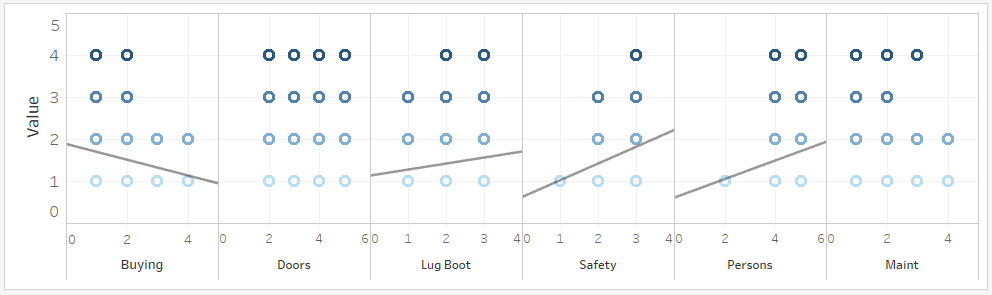

**We can see some linear relationships which are marked with trend lines.
This tells us that we can most likely a linear classification model.**

In [88]:
#Create the matrix of features
X = dataset.iloc[:, :-1].values
X

array([[4, 4, 2, 2, 1, 1],
       [4, 4, 2, 2, 1, 2],
       [4, 4, 2, 2, 1, 3],
       ...,
       [1, 1, 5, 5, 3, 1],
       [1, 1, 5, 5, 3, 2],
       [1, 1, 5, 5, 3, 3]], dtype=int64)

In [89]:
#create dependant variable vector
y = dataset.iloc[:,6].values
y

array([1, 1, 1, ..., 1, 3, 4], dtype=int64)

In [90]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
#Fitting the Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
#Predict the test set results
y_pred = classifier.predict(X_test)

#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

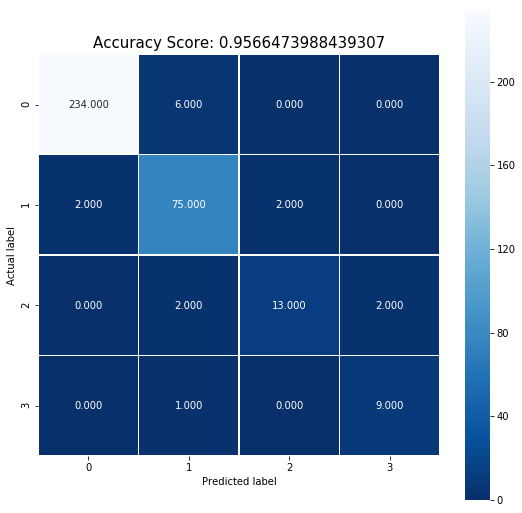

In [101]:
### Visualizing the confusion matrix.
import seaborn as sns
score = classifier.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**It's possible the number of records for each value was too skewed for logistic regression to use.**

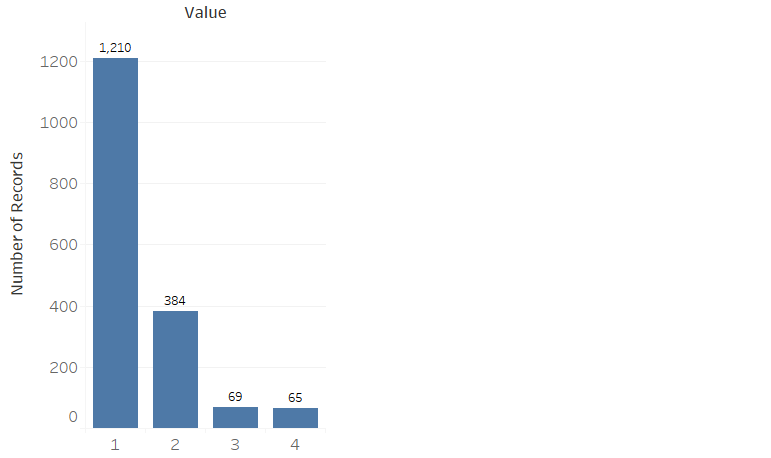

**We will try SVM instead since it is very good with linear datasets and is not susceptible to overfitting**

In [96]:
#Trying SVM instead since it's good for Linear Datasets and Isn't affected.
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

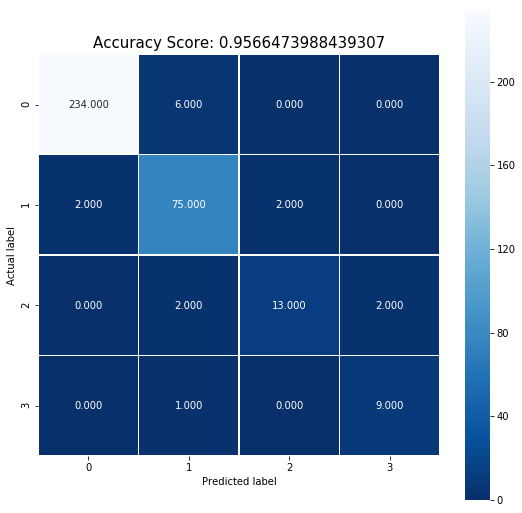

In [97]:
score = classifier.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**With this trained model, we can predict the evaluation score of a car for these categories, to a 95% accuracy.**